In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

### First I want to load in and do a time lapse curvature plot

In [2]:
# interpolate
# for filename in os.listdir("extracted_data"):
#     loaded_arr = np.load(filename)

In [3]:
fnames = [
    "im01",
    "im02",
    "im03",
    "im04",
    "im05",
    "im06",
    "im07",
    "im08",
    "im09",
    "im10",
    "im11",
]
fnames = ["extracted_data/" + s + ".npz" for s in fnames]

In [4]:
# format is cropped image, interpolated line, interpolation points, curvature, and crop points!
cropped_images = []
interpolated_lines = []
interpolation_points = []
curvatures = []
crop_points = []

In [5]:
for f in fnames:
    arr = np.load(f)
    cropped_images.append(arr["arr_0"])
    interpolated_lines.append(arr["arr_1"])
    interpolation_points.append(arr["arr_2"])
    curvatures.append(arr["arr_3"])
    crop_points.append(arr["arr_4"])

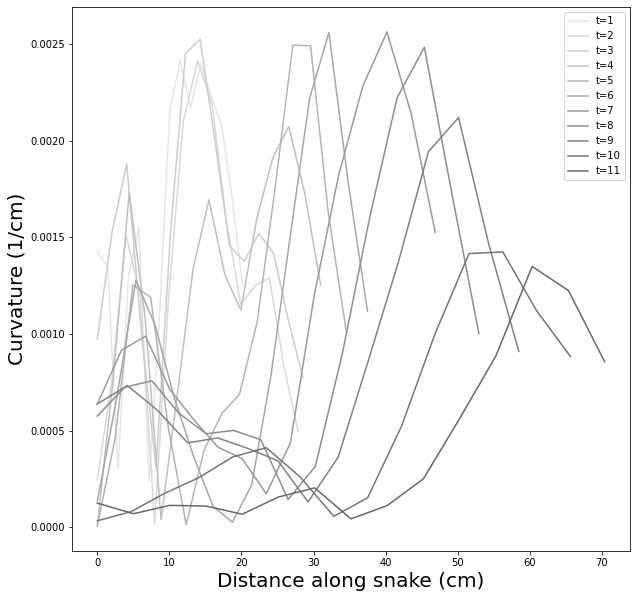

In [6]:
plt.figure(figsize=(10, 10))
for i in range(len(cropped_images)):
    plt.plot(
        interpolation_points[i],
        curvatures[i],
        label=f"t={i+1}",
        color=(0.9 - i / 20, 0.9 - i / 20, 0.9 - i / 20),
    )

plt.legend()
plt.xlabel("Distance along snake (cm)", fontsize=20)
plt.ylabel("Curvature (1/cm)", fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(len(cropped_images)):
    plt.plot(
        interpolation_points[i],
        curvatures[i],
        label=f"t={i+1}",
        color=(1 - i / 20, 1 - i / 20, 1 - i / 20),
    )

plt.legend()
plt.xlabel("Distance along snake (cm)", fontsize=20)
plt.ylabel("Curvature (1/cm)", fontsize=20)
plt.show()

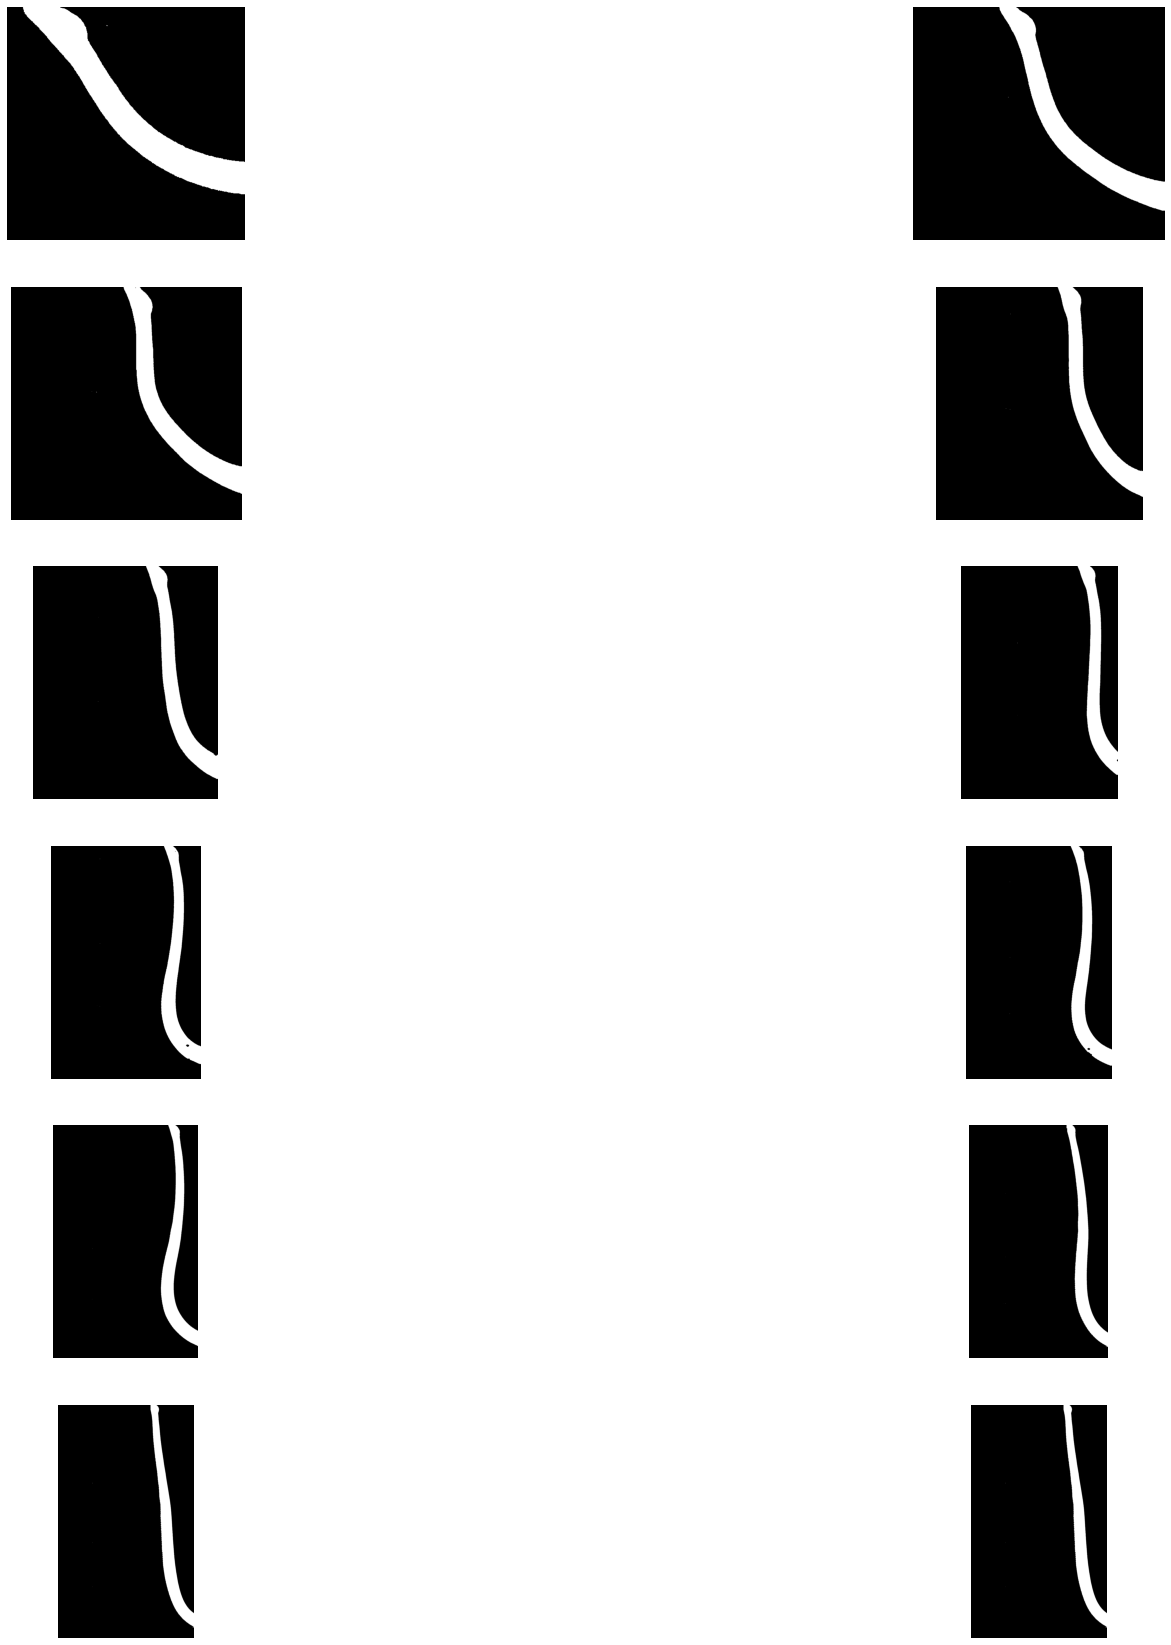

In [35]:
fig, ax = plt.subplots(6, 2, figsize=(30, 30))
for i in range(len(cropped_images)):
    row = math.floor(i / 2)
    if i % 2 == 0:
        ax[row, 0].imshow(cropped_images[i], cmap="gray")
        ax[row, 0].axis("off")
    else:
        ax[row, 1].imshow(cropped_images[i], cmap="gray")
        ax[row, 1].axis("off")
    if i == 10:
        ax[row, 1].imshow(cropped_images[i], cmap="gray")
        ax[row, 1].axis("off")
# plt.show()
plt.savefig("tester.png")

In [24]:
math.floor(9 / 2)

4